# biocharStability - a tiny demonstration

This notebook shows the basics of how to use the functions contained in the ``biocharStability`` library.

__Pre-requisites:__
- your forked/cloned/downloaded the GitHub repository (https://github.com/SLU-biochar/biocharStability)
- you created a python environment (``conda create -n biocharstab python=3.9``)
- in this environment, you installed via pip (in editable format) the ``biocharStability`` library (``pip install -e .``). 

Note: core dependencies will also be installed via the pip command. If something is missing in the environment, install it via conda or pip, on your own, whenever an error occurs, telling a package is missing  :-)

More info on installation here https://github.com/SLU-biochar/biocharStability#how-to-install-or-use

__Documentation:__

The library has an automatically generated documentation. Go to the folder ``docs`` and open the ``index.html`` file in a web browser.

__Contents of this notebook:__
- importing the library
- access functions documentation strings
- load the data
- do something with the data

## The basics: load the data

In [1]:
%pip install -e ..

Obtaining file:///Users/mansiagrawal/Documents/GitHub/biocharStability
  Preparing metadata (setup.py) ... done
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached python_ternary-1.0.8-py3-none-any.whl.metadata (1.0 kB)
  Using cached bokeh-3.4.3-py3-none-any.whl.metadata (12 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached stats_arrays-0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached lmfit-1.3.4-py3-none-any.whl.metadata (8.8 kB)
  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached numdifftools-0.9.41-py2.py3-none-any.whl.metadata (39 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.m

In [3]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))  # from notebooks-demo/ to repo root
import biocharStability as bs

In [5]:
# importing the library (and other libraries as needed)
import biocharStability as bs
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
# functions available can be accessed by typing bs. 
# press tab key after ``bs.``, to get a dropdown of available functions / submodules
# put a ``?`` at the end of function and run the cell to load the docstrings
bs.utils.load_articles?

Signature:
bs.utils.load_articles(
    filepath,
    sheet_name='articles',
    index_col=None,
    usecols='A:P',
    skiprows=3,
    schema_rows=3,
    last_row=None,
)
Docstring:
From the biochar stability database (.xlsx), loads the article sheet

Returns:
- pandas dataframe, articles

Usage: 

    articles = load_articles(filepath='biochar_incubation_database_2022-03-22_v0.xlsx')
File:      ~/Documents/GitHub/biocharStability/biocharStability/utils.py
Type:      function

In [7]:
# load the data, in pandas dataframes
fp = '../biocharStability/database/biochar_incubation_database_2022-03-22_live.xlsx' # relative or absolute path to database .xlsx file
metadata, schema, metadata_column_sets = bs.load_metadata(filepath=fp)
data = bs.load_data(filepath=fp)
articles = bs.load_articles(filepath=fp)
validation = bs.load_validation(filepath=fp)

Metadata loaded, with 187 rows
Data loaded, with 2941 rows
Articles loaded, with 76 rows
Validation loaded, with 151 rows


In [8]:
# calculate some statistics
bs.print_database_completion_stats(articles, data, metadata, validation, schema)

** Completion statistics **
	** table: articles **
Number of data cells : 1095 ( 100.0 % )
Number of cells with 'available' information : 917 ( 83.7 % )
Number of cells with 'not available' information : 0 ( 0.0 % )
Number of empty cells (NaN) : 178 ( 16.3 % )
	** table: data **
Number of data cells : 76362 ( 100.0 % )
Number of cells with 'available' information : 25016 ( 32.8 % )
Number of cells with 'not available' information : 0 ( 0.0 % )
Number of empty cells (NaN) : 51346 ( 67.2 % )
	** table: metadata **
Number of data cells : 11584 ( 100.0 % )
Number of cells with 'available' information : 7083 ( 61.1 % )
Number of cells with 'not available' information : 2334 ( 20.1 % )
Number of empty cells (NaN) : 2167 ( 18.7 % )
	** table: validation **
Number of data cells : 16050 ( 100.0 % )
Number of cells with 'available' information : 3009 ( 18.7 % )
Number of cells with 'not available' information : 2425 ( 15.1 % )
Number of empty cells (NaN) : 10616 ( 66.1 % )

** Number of articles

In [9]:
# some more stats
bs.print_metadata_stats(metadata)

Biomass types included:
| BiomassClass   |   Counts |    % |
|----------------|----------|------|
| wood           |       80 | 44.2 |
| nan            |       38 | 21.0 |
| crop           |       34 | 18.8 |
| grass          |       22 | 12.2 |
| manure         |        4 |  2.2 |
| leaf           |        2 |  1.1 |
| biosolids      |        1 |  0.6 |


Pyrolysis types included:
| PyrolysisClass   |   Counts |    % |
|------------------|----------|------|
| pyr-slow         |      131 | 72.4 |
| nan              |       38 | 21.0 |
| no-treat         |        5 |  2.8 |
| gas              |        4 |  2.2 |
| htc              |        2 |  1.1 |
| pyr-flash        |        1 |  0.6 |




In [10]:
# look at the dataframes
metadata.head(3)

,ID_art,AuthorDate,NameObs,Replicates,Biomass,BiomassClass,BiomassLignin,Pyrolysis,PyrolysisClass,HHT,...,ParticleSize,BulkDensity,TrueDensity,OxidationH2O2,BiocharYield,δ ¹³C biochar,δ ¹³C soil,ID_Lehmann2019,ID_Woolf2021,ID_Lehmann2021
ID_obs,,,,,,,,,,,,,,,,,,,,,
1,1,Major2010,Black C material 1-2,3,Prunings of old mango trees,wood,0.2375,Biochar 1: mound of tightly packed logs (appro...,pyr-slow,500.0,...,<0.9mm sieve,na,na,na,na,-28.2 to -28.9,"-10,9 to -13,5",I29,W49,L48
3,9,Wu2016,LN,3,"rice straw, 13C labeled",crop,NaN,"GDL-1500X tubular furnace, N2 atmosphere",pyr-slow,500.0,...,na,na,na,na,na,570.68,-24.51,I24,W64,L63
4,9,Wu2016,SD,3,"rice straw, 13C labeled",crop,NaN,"GDL-1500X tubular furnace, N2 atmosphere",pyr-slow,500.0,...,na,na,na,na,na,570.68,-23.87,I25,W65,L64


In [11]:
data.head(10)

,ID_obs,ID_art,time,date,F_tot_abs,d_bc,d_soc,F_bc_abs,F_soc_abs,F_bc_rel,...,k_bc_rel0,k_bc_reld,C_bc_loss_abs,C_bc_loss_rel,C_bc_rem_abs,C_bc_rem_rel,C_tot_loss_abs,C_tot_loss_rel,P_soc_abs,P_soc_rel
4,1,1,0,2009-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,1568.32,1,NaN,NaN,NaN,NaN
5,1,1,1,2009-05-18 00:00:00,NaN,NaN,NaN,0.013208,NaN,0.000008,...,0.000842,0.000842,0.013208,0.000842,15.669992,0.999158,NaN,NaN,NaN,NaN
6,1,1,15,2009-06-01 00:00:00,NaN,NaN,NaN,0.021919,NaN,0.000014,...,0.0001,0.0001,0.035127,0.00224,15.648073,0.99776,NaN,NaN,NaN,NaN
7,1,1,38,2009-06-24 00:00:00,NaN,NaN,NaN,0,NaN,0,...,0,0,0.035127,0.00224,15.648073,0.99776,NaN,NaN,NaN,NaN
8,1,1,70,2009-07-26 00:00:00,NaN,NaN,NaN,0.009886,NaN,0.000006,...,0.00002,0.00002,0.045013,0.00287,15.638187,0.99713,NaN,NaN,NaN,NaN
9,1,1,127,2009-09-21 00:00:00,NaN,NaN,NaN,0.190717,NaN,0.000122,...,0.000213,0.000214,0.23573,0.015031,15.44747,0.984969,NaN,NaN,NaN,NaN
10,1,1,185,2009-11-18 00:00:00,NaN,NaN,NaN,0.030045,NaN,0.000019,...,0.000033,0.000034,0.265775,0.016946,15.417425,0.983054,NaN,NaN,NaN,NaN
11,1,1,202,2009-12-05 00:00:00,NaN,NaN,NaN,0.00113,NaN,0.000001,...,0.000004,0.000004,0.266905,0.017019,15.416295,0.982981,NaN,NaN,NaN,NaN
12,1,1,217,2009-12-20 00:00:00,NaN,NaN,NaN,0.000008,NaN,0.0,...,0.0,0.0,0.266913,0.017019,15.416287,0.982981,NaN,NaN,NaN,NaN
13,1,1,232,2010-01-04 00:00:00,NaN,NaN,NaN,0.000008,NaN,0.0,...,0.0,0.0,0.266921,0.01702,15.416279,0.98298,NaN,NaN,NaN,NaN


## Plot some time series

The three main columns:
- C_bc_rem_rel > biochar C remaining in % (0-1)
- C_bc_loss_rel > biochar C lost in % (0-1)
- k_bc_rel0 > decay rates in gC per gC intial per day

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Biochar C remaining, %')

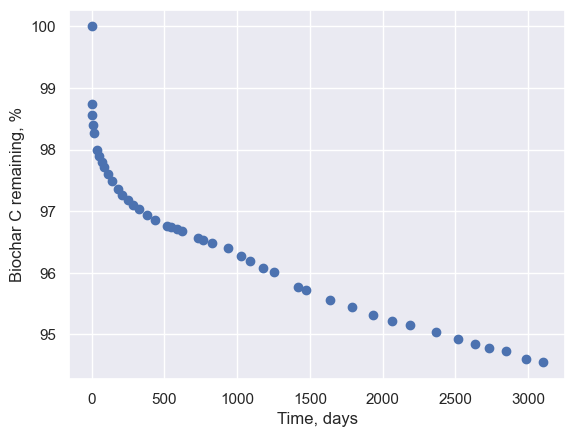

In [13]:
# select the decay data from a specific observations, and plot one curve from it
obs66 = bs.select_mineralization_data(ID_obs=40, data=data)
f, ax = plt.subplots()
ax.scatter(obs66['time'], obs66['C_bc_rem_rel']*100)
ax.set_xlabel('Time, days')
ax.set_ylabel('Biochar C remaining, %')

Incubation longer than 30 months --->  17  observations
Incubation longer than 20 months --->  44  observations
Incubation longer than 12 months --->  15  observations
Incubation longer than 0 months --->  67  observations


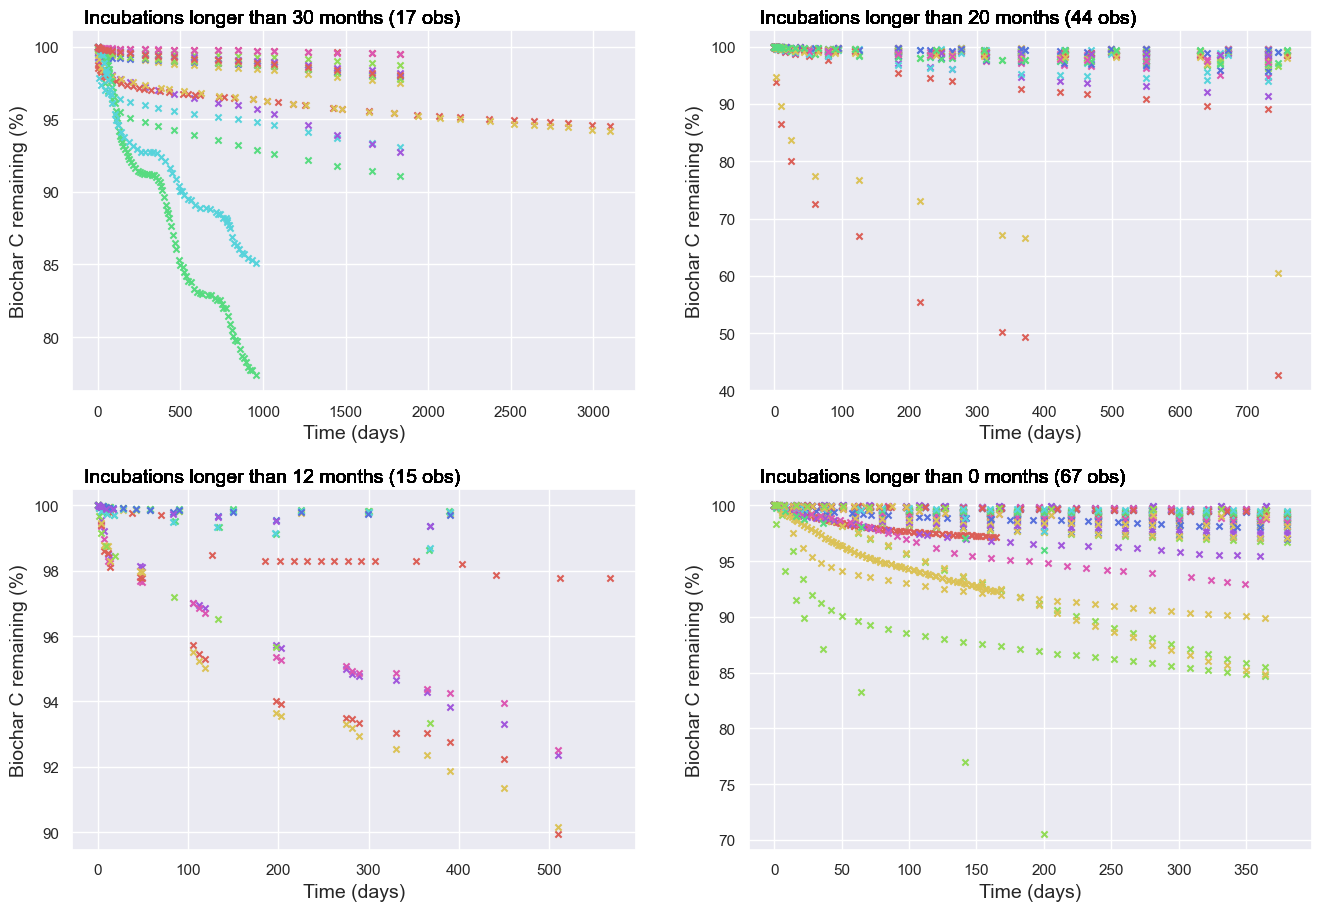

In [14]:
months_cutoffs, sets_incubations, sets_labels = bs.classify_observations_by_duration(metadata)

fig, axes, axl = bs.plot_timeseries_by_group(data, metadata, sets_incubations, 'C_bc_rem_rel', titles=sets_labels,
                                             ylabel="Biochar C remaining (%)", factor=100,
                                             saveFig=False)

## Look at some of the metadata available

<Axes: >

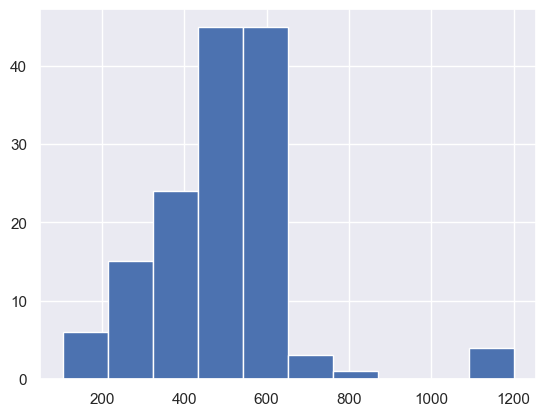

In [15]:
metadata['HHT'].hist() # quick histogram of pyrolysis temperatures

/var/folders/cw/gtv6tgz55y9fbzvv1k8x20v00000gn/T/ipykernel_94384/1523228929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata.replace('na', np.nan, inplace=True)


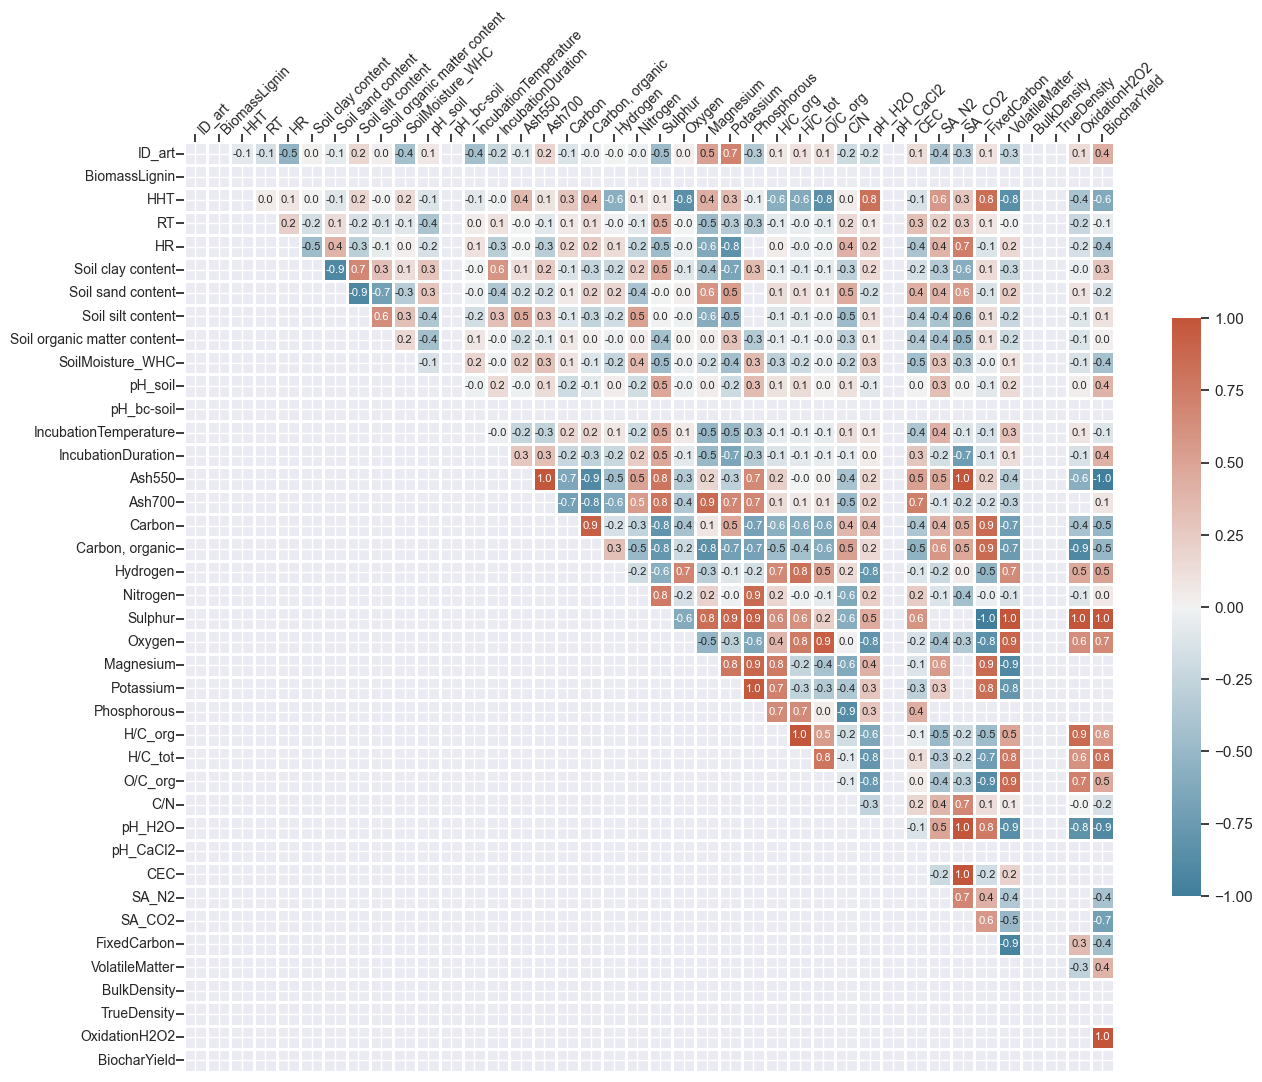

In [16]:
%matplotlib inline

metadata.replace('na', np.nan, inplace=True) 
    # missing data in the metadata is sometimes noted as "na", 
    # meaning it was not available in the work. These must be removed before plotting.
    
with sns.axes_style("darkgrid"):    
    # Correlation
    corr = metadata.corr(method='pearson', numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool)).T
    meta_numeric = corr.columns

    f, ax = plt.subplots(figsize=(15, 15))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    #corr[['BC_50', 'BC_100', 'BC_150', 'BC_200']]
    sns.heatmap(corr, cmap=cmap, center=0, mask=mask,
                square=True, linewidths=.9, linecolor='white',
                cbar_kws={"shrink": .5},
                annot=True, annot_kws={"size": 8}, fmt='.1f')

    ax.tick_params(axis='both', which='major', labelsize=10, 
                   labelbottom = False, bottom=False, top = True, labeltop=True, left=True,
                   pad=0)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='left', verticalalignment='baseline',
                       parse_math=True);


## Curve fitting examples

/Users/mansiagrawal/Documents/GitHub/biocharStability/biocharStability/analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


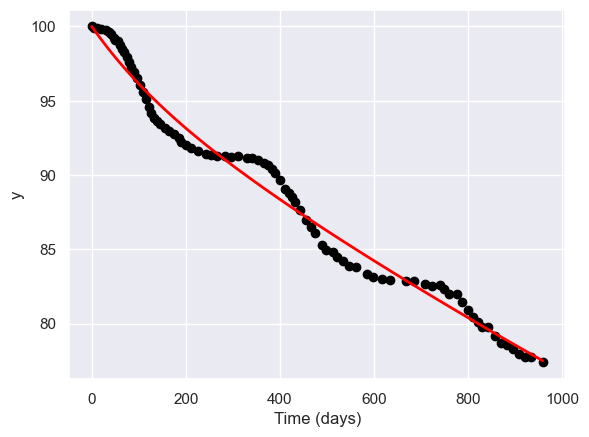

[[Fit Statistics]]
    # data points:  89
    # variables:  3
    chi-square:  77.70029487614792
    reduced chi-square:  0.9034918008854409
    Akaike info crit:  -6.084181240226918
    Bayesian info crit:  1.3817278689695005
[[Variables]]
    k1: 0.00686534637248384 +/- 0.002740299597059319 (39.914950366413855 %)
    k2: 0.0002304641024356224 +/- 1.3366235638666642e-05 (5.799703944088365 %)
    c1: 3.3399741294862744 +/- 0.9665367322664155 (28.938449664431374 %)
[[Correlations]] (unreported correlations are < 0.100)
    C(k2, c1) = -0.9790772348143876
    C(k1, c1) = -0.9246972161290218
    C(k1, k2) = 0.8735597415673094


In [17]:
# try out some curve-fitting - uscing scipy (library)
x, y = bs.select_timeseries(46, data, 'C_bc_rem_rel', factor=100)
p_opt, p_cov, p_std, r2, _, _, _ = bs.do_the_fit(f_model=bs.doubleExp, xdata=x, ydata=y,
                                              p0=None, method='trf', bounds=(-np.inf,np.inf), showPlot=True)

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 296
    # data points      = 89
    # variables        = 3
    chi-square         = 77.7003632
    reduced chi-square = 0.90349260
    Akaike info crit   = -6.08410297
    Bayesian info crit = 1.38180614
[[Variables]]
    k1:  0.00686153 +/- 0.00235439 (34.31%) (init = 0)
    k2:  2.3043e-04 +/- 1.1954e-05 (5.19%) (init = 0)
    c1:  3.34310584 +/- 0.84949648 (25.41%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(k2, c1) = -0.9737
    C(k1, c1) = -0.9014
    C(k1, k2) = +0.8378


/Users/mansiagrawal/Documents/GitHub/biocharStability/biocharStability/analyse.py:59: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-k1*t)+ (100-c1)*np.exp(-k2*t)


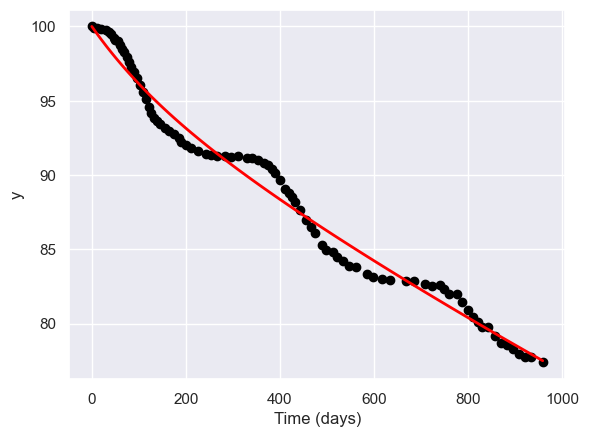

In [18]:
# try out some curve-fitting - uscing lmfit (library)
_ = bs.do_the_lmfit(f_model=bs.doubleExp, xdata=x, ydata=y, method='trf', bounds=(0,1000), showPlot=True)

Many more things can be done with functions pre-built in the library. 

Check out the documentation to explore the functions available. 

Check out the next demo notebook.

Cheers.
